In [0]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 15

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [49]:
print (x_train.shape)

(60000, 28, 28)


In [0]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)



In [51]:
print (K.image_data_format())

channels_last


In [52]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')



x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Architecture 0 : This is the exact code from assignment

In [54]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 12s 195us/step - loss: 0.2662 - acc: 0.9197 - val_loss: 0.0615 - val_acc: 0.9815
Epoch 2/15
60000/60000 [==============================] - 9s 153us/step - loss: 0.0918 - acc: 0.9729 - val_loss: 0.0400 - val_acc: 0.9862
Epoch 3/15
60000/60000 [==============================] - 9s 151us/step - loss: 0.0662 - acc: 0.9798 - val_loss: 0.0349 - val_acc: 0.9887
Epoch 4/15
60000/60000 [==============================] - 9s 151us/step - loss: 0.0580 - acc: 0.9824 - val_loss: 0.0403 - val_acc: 0.9868
Epoch 5/15
60000/60000 [==============================] - 9s 152us/step - loss: 0.0475 - acc: 0.9860 - val_loss: 0.0301 - val_acc: 0.9899
Epoch 6/15
60000/60000 [==============================] - 9s 153us/step - loss: 0.0421 - acc: 0.9872 - val_loss: 0.0327 - val_acc: 0.9885
Epoch 7/15
60000/60000 [==============================] - 9s 152us/step - loss: 0.0364 - acc: 0.9888 - val_loss: 0.0288 -

Model :1
****************
Architecture 1: (In the architecture in this assignemnt after flattening lets directly put into softmax the reason being i would personally like to observe what affects convulation brings in as in previous assignment we already tried 2,3,5 hidden layers and we saw without convolution we can have greater than 97% accuracy. However may be 1 architecture i would like to try with multiple MLPs after flattening too. Lets get started).

Lets Try: (3x3 kernel)
************************************************************************************

Lets try:

2 Conv Layers --> MaxPool --> Dropout -->2 Conv Layers --> Dropout --> Flatenning --> softmax

In [55]:
import warnings
warnings.filterwarnings('ignore')

model1 = Sequential()
model1.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))
model1.add(Conv2D(76, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model1.add(Conv2D(116, (3, 3), activation='relu'))
model1.add(Dropout(0.25))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(num_classes, activation='softmax'))
model1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
history1 = model1.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score1 = model1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 17s 282us/step - loss: 0.2504 - acc: 0.9214 - val_loss: 0.0407 - val_acc: 0.9870
Epoch 2/15
60000/60000 [==============================] - 14s 236us/step - loss: 0.0691 - acc: 0.9798 - val_loss: 0.0297 - val_acc: 0.9896
Epoch 3/15
60000/60000 [==============================] - 14s 240us/step - loss: 0.0492 - acc: 0.9861 - val_loss: 0.0261 - val_acc: 0.9914
Epoch 4/15
60000/60000 [==============================] - 14s 236us/step - loss: 0.0385 - acc: 0.9886 - val_loss: 0.0253 - val_acc: 0.9916
Epoch 5/15
60000/60000 [==============================] - 14s 236us/step - loss: 0.0330 - acc: 0.9903 - val_loss: 0.0219 - val_acc: 0.9932
Epoch 6/15
60000/60000 [==============================] - 14s 236us/step - loss: 0.0287 - acc: 0.9915 - val_loss: 0.0193 - val_acc: 0.9934
Epoch 7/15
60000/60000 [==============================] - 14s 237us/step - loss: 0.0247 - acc: 0.9924 - val_loss: 0.

In [0]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

Test score: 0.018639867549146902
Test accuracy: 0.9946


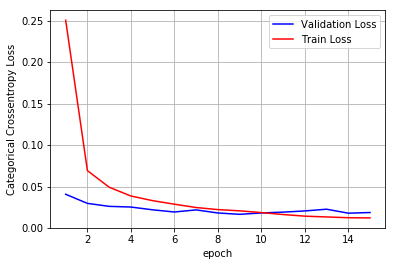

In [57]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt

score1 = model1.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score1[0]) 
print('Test accuracy:', score1[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy1 = history1.history['val_loss']
ty1 = history1.history['loss']
plt_dynamic(x, vy1, ty1, ax)

Model 2:
************************
Architecture 1B: (5x5 Kernel)

************************************************************************************

Lets try 2 Conv Layers --> MaxPool --> Dropout -->2 Conv Layers --> Max Pool --> Dropout --> Flatenning --> softmax

In [58]:
import warnings
warnings.filterwarnings('ignore')

model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
model2.add(Conv2D(76, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model2.add(Conv2D(116, (3, 3), activation='relu'))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(num_classes, activation='softmax'))
model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
history2=model2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score2 = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 15s 257us/step - loss: 0.2740 - acc: 0.9140 - val_loss: 0.0538 - val_acc: 0.9828
Epoch 2/15
60000/60000 [==============================] - 12s 208us/step - loss: 0.0659 - acc: 0.9813 - val_loss: 0.0317 - val_acc: 0.9898
Epoch 3/15
60000/60000 [==============================] - 12s 208us/step - loss: 0.0466 - acc: 0.9865 - val_loss: 0.0242 - val_acc: 0.9926
Epoch 4/15
60000/60000 [==============================] - 12s 207us/step - loss: 0.0365 - acc: 0.9897 - val_loss: 0.0216 - val_acc: 0.9932
Epoch 5/15
60000/60000 [==============================] - 12s 208us/step - loss: 0.0309 - acc: 0.9909 - val_loss: 0.0185 - val_acc: 0.9941
Epoch 6/15
60000/60000 [==============================] - 13s 208us/step - loss: 0.0261 - acc: 0.9924 - val_loss: 0.0196 - val_acc: 0.9943
Epoch 7/15
60000/60000 [==============================] - 12s 208us/step - loss: 0.0219 - acc: 0.9938 - val_loss: 0.

Test score: 0.016713278533476067
Test accuracy: 0.9956


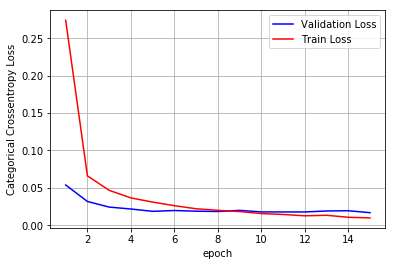

In [59]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt

score2 = model2.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score2[0]) 
print('Test accuracy:', score2[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy2 = history2.history['val_loss']
ty2 = history2.history['loss']
plt_dynamic(x, vy2, ty2, ax)

Model 3:
*********************
Architecture 1c: (Lets try 3x3 and 5x5 kenel both).

************************************************************************************

Lets try 2 Conv Layers --> MaxPool --> Dropout -->2 Conv Layers --> Max Pool --> Dropout --> Flatenning --> softmax

In [60]:
import warnings
warnings.filterwarnings('ignore')

model3 = Sequential()
model3.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))
model3.add(Conv2D(76, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model3.add(Conv2D(116, (3, 3), activation='relu'))
model3.add(Dropout(0.25))
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(num_classes, activation='softmax'))
model3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
history3=model3.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score3 = model3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score3[0])
print('Test accuracy:', score3[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 17s 278us/step - loss: 0.2713 - acc: 0.9162 - val_loss: 0.0412 - val_acc: 0.9874
Epoch 2/15
60000/60000 [==============================] - 13s 221us/step - loss: 0.0655 - acc: 0.9812 - val_loss: 0.0300 - val_acc: 0.9905
Epoch 3/15
60000/60000 [==============================] - 13s 221us/step - loss: 0.0450 - acc: 0.9871 - val_loss: 0.0287 - val_acc: 0.9913
Epoch 4/15
60000/60000 [==============================] - 13s 221us/step - loss: 0.0361 - acc: 0.9893 - val_loss: 0.0188 - val_acc: 0.9945
Epoch 5/15
60000/60000 [==============================] - 13s 222us/step - loss: 0.0290 - acc: 0.9917 - val_loss: 0.0260 - val_acc: 0.9920
Epoch 6/15
60000/60000 [==============================] - 13s 221us/step - loss: 0.0233 - acc: 0.9929 - val_loss: 0.0195 - val_acc: 0.9943
Epoch 7/15
60000/60000 [==============================] - 13s 219us/step - loss: 0.0218 - acc: 0.9935 - val_loss: 0.

Test score: 0.02145034878313072
Test accuracy: 0.9957


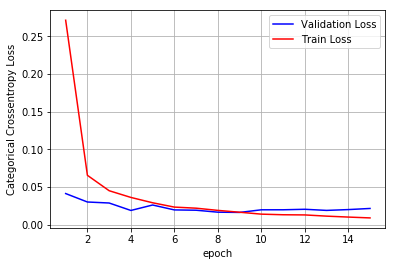

In [61]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt

score3 = model3.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score3[0]) 
print('Test accuracy:', score3[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy3 = history3.history['val_loss']
ty3 = history3.history['loss']
plt_dynamic(x, vy3, ty3, ax)

Model 4:
********************************
Architecture 2: (lets try 3x3,5x5 and 1X1 kernel)
*********************************************************
Lets try 2 Conv Layers --> MaxPool --> Dropout -->2 Conv Layers --> Max Pool --> Dropout --> BN --> 2 Conv Layer --> Flatenning --> softmax

In [62]:
from keras.layers.normalization import BatchNormalization

import warnings
warnings.filterwarnings('ignore')

model4 = Sequential()
model4.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model4.add(Conv2D(64, (3, 3), activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))
model4.add(Conv2D(76, kernel_size=(5, 5),activation='relu'))
model4.add(Conv2D(116, (3, 3), activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 1)))
model4.add(Dropout(0.25))
model4.add(BatchNormalization())
model4.add(Conv2D(150, kernel_size=(1, 1),activation='relu'))
model4.add(Conv2D(192, kernel_size=(1, 1),activation='relu'))
model4.add(Flatten())
model4.add(Dense(128, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(num_classes, activation='softmax'))
model4.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
history4=model4.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score4 = model4.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score4[0])
print('Test accuracy:', score4[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 21s 342us/step - loss: 0.2079 - acc: 0.9346 - val_loss: 0.0786 - val_acc: 0.9771
Epoch 2/15
60000/60000 [==============================] - 16s 269us/step - loss: 0.0605 - acc: 0.9826 - val_loss: 0.0306 - val_acc: 0.9898
Epoch 3/15
60000/60000 [==============================] - 16s 272us/step - loss: 0.0446 - acc: 0.9866 - val_loss: 0.0271 - val_acc: 0.9919
Epoch 4/15
60000/60000 [==============================] - 16s 269us/step - loss: 0.0364 - acc: 0.9895 - val_loss: 0.0409 - val_acc: 0.9868
Epoch 5/15
60000/60000 [==============================] - 16s 269us/step - loss: 0.0304 - acc: 0.9914 - val_loss: 0.0306 - val_acc: 0.9927
Epoch 6/15
60000/60000 [==============================] - 16s 271us/step - loss: 0.0269 - acc: 0.9923 - val_loss: 0.0263 - val_acc: 0.9916
Epoch 7/15
60000/60000 [==============================] - 16s 270us/step - loss: 0.0255 - acc: 0.9928 - val_loss: 0.

Test score: 0.026034193900959873
Test accuracy: 0.9945


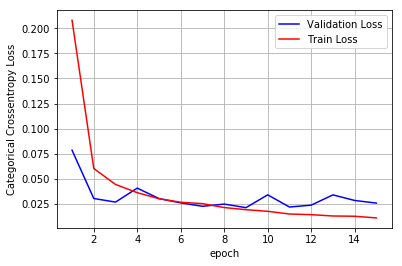

In [63]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt

score4 = model4.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score4[0]) 
print('Test accuracy:', score4[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy4 = history4.history['val_loss']
ty4 = history4.history['loss']
plt_dynamic(x, vy4, ty4, ax)

Model 5:
*********************
Architecture 3A: (Lets Try 3x3 Kernel)
*********************************************************
Lets try 2 Conv Layers --> MaxPool --> Dropout -->BN-->1 Conv Layers --> Max Pool --> Dropout --> BN --> 1 Conv Layer --> Max pool  -->1 Conv Layers --> Max Pool --> Dropout -->Flatenning -->softmax

In [64]:
import warnings
warnings.filterwarnings('ignore')

model5 = Sequential()
model5.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model5.add(Conv2D(64, (3, 3), activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.25))
model5.add(BatchNormalization())
model5.add(Conv2D(76, kernel_size=(1, 1),activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 1)))
model5.add(Dropout(0.25))
model5.add(BatchNormalization())
model5.add(Conv2D(150, kernel_size=(1, 1),activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 1)))
model5.add(Conv2D(172, kernel_size=(1, 1),activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 1)))
model5.add(Dropout(0.25))
model5.add(Flatten())
model5.add(Dense(128, activation='relu'))
model5.add(Dropout(0.5))
model5.add(Dense(num_classes, activation='softmax'))
model5.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
history5=model5.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score5 = model5.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score5[0])
print('Test accuracy:', score5[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 20s 339us/step - loss: 0.6228 - acc: 0.7948 - val_loss: 0.1208 - val_acc: 0.9621
Epoch 2/15
60000/60000 [==============================] - 16s 262us/step - loss: 0.2126 - acc: 0.9362 - val_loss: 0.1023 - val_acc: 0.9704
Epoch 3/15
60000/60000 [==============================] - 16s 263us/step - loss: 0.1647 - acc: 0.9512 - val_loss: 0.1019 - val_acc: 0.9681
Epoch 4/15
60000/60000 [==============================] - 16s 263us/step - loss: 0.1424 - acc: 0.9590 - val_loss: 0.0712 - val_acc: 0.9793
Epoch 5/15
60000/60000 [==============================] - 16s 263us/step - loss: 0.1276 - acc: 0.9622 - val_loss: 0.0687 - val_acc: 0.9795
Epoch 6/15
60000/60000 [==============================] - 16s 261us/step - loss: 0.1166 - acc: 0.9659 - val_loss: 0.0617 - val_acc: 0.9825
Epoch 7/15
60000/60000 [==============================] - 16s 264us/step - loss: 0.1107 - acc: 0.9684 - val_loss: 0.

Test score: 0.06078117031700331
Test accuracy: 0.9837


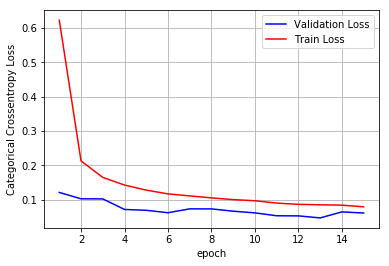

In [65]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt

score5 = model5.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score5[0]) 
print('Test accuracy:', score5[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy5 = history5.history['val_loss']
ty5 = history5.history['loss']
plt_dynamic(x, vy5, ty5, ax)

Model 6:
*******************
Architecture 4:(Lets along with best of previous example also add multiple MLPs at end lets see is MLP able to any further enhance performance, though CNN is much better alogorithm as discussed in the class but how about CNN+MLP???)

Lets try :

Lets try 2 Conv Layers --> MaxPool --> Dropout -->2 Conv Layers --> Max Pool --> Dropout --> Flatenning -->FC1-->FC2-->FC3-->Softmax

In [67]:
import warnings
warnings.filterwarnings('ignore')

model6 = Sequential()
model6.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model6.add(Conv2D(64, (3, 3), activation='relu'))
model6.add(MaxPooling2D(pool_size=(2, 2)))
model6.add(Dropout(0.25))
model6.add(Conv2D(76, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model6.add(Conv2D(116, (3, 3), activation='relu'))
model6.add(Dropout(0.25))
model6.add(Flatten())
model6.add(Dense(512, activation='relu'))
model6.add(Dropout(0.5))
model6.add(Dense(456, activation='relu'))
model6.add(BatchNormalization())
model6.add(Dropout(0.5))


model6.add(Dense(392, activation='relu'))
model6.add(BatchNormalization())
model6.add(Dropout(0.5))

model6.add(Dense(256, activation='relu') )
model6.add(BatchNormalization())
model6.add(Dropout(0.5))

model6.add(Dense(128, activation='relu') )
model6.add(BatchNormalization())
model6.add(Dropout(0.5))

model6.add(Dense(num_classes, activation='softmax'))
model6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history6 =model6.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score6 = model6.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score6[0])
print('Test accuracy:', score6[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 24s 402us/step - loss: 1.3546 - acc: 0.5712 - val_loss: 0.1445 - val_acc: 0.9565
Epoch 2/15
60000/60000 [==============================] - 19s 310us/step - loss: 0.1416 - acc: 0.9650 - val_loss: 0.0600 - val_acc: 0.9834
Epoch 3/15
60000/60000 [==============================] - 19s 309us/step - loss: 0.0881 - acc: 0.9778 - val_loss: 0.0551 - val_acc: 0.9883
Epoch 4/15
60000/60000 [==============================] - 19s 312us/step - loss: 0.0686 - acc: 0.9827 - val_loss: 0.0620 - val_acc: 0.9848
Epoch 5/15
60000/60000 [==============================] - 19s 315us/step - loss: 0.0575 - acc: 0.9855 - val_loss: 0.0452 - val_acc: 0.9894
Epoch 6/15
60000/60000 [==============================] - 19s 311us/step - loss: 0.0487 - acc: 0.9875 - val_loss: 0.0302 - val_acc: 0.9930
Epoch 7/15
60000/60000 [==============================] - 19s 312us/step - loss: 0.0464 - acc: 0.9890 - val_loss: 0.

Test score: 0.031870553250098604
Test accuracy: 0.993


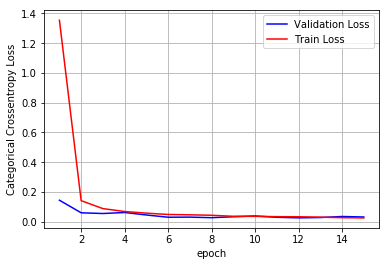

In [68]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt

score6 = model6.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score6[0]) 
print('Test accuracy:', score6[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy6 = history6.history['val_loss']
ty6 = history6.history['loss']
plt_dynamic(x, vy6, ty6, ax)




S.No | Architecture          | Test Loss     | Test Accuracy|
-----| ----------------------|---------------| ------------ |
1.   |  Model 1              |0.02279824664  |0.9931        | 
2.   |  Model 2              |0.02237644133  |0.9947        | 
3.   |  Model 3              |0.0181942476   |0.9952        | 
4.   |  Model 4              |0.022776587270 |0.9948        | 
5.   |  Model 5              |0.05685220     |0.9838        | 
6.   |  Model 6              |0.038624691    |0.9926        | 




Interesting Observations:

1) The very first epoch of each model's performance decreases as number of layers increases. Can we conclude something from this? I dont think so just may be as layers increases probably for MNIST kind of data set it is kind of overkill and way too many parameters to learn.

2)But eventually as we train more epoch the model which are deeper tends to perform better. This is as expected. Model 3 performs better than model 1 and model 2

3)As we keep on increasing too many layers performance dencreases. May be we can conclude some sort of overfitting happening

4)The last model was stupid model because we initially trained using CNN than we used MLP with multiple layers (ofcourse after flattening) but whatever "good" information was learned by CNN model was kind of lost due to next "MLP layers"